## Aim
Crop yield prediction is crucial for addressing food security and climate change impacts due to agriculture's significant role in the global economy. Accurate crop yield forecasting, which depends on factors like weather, pesticides, and historical data, aids in agricultural risk management and future planning. This project uses machine learning techniques to predict the yields of the top 10 most consumed crops worldwide, which include cassava, maize, plantains, potatoes, rice, sorghum, soybeans, sweet potatoes, wheat, and yams. The project treats this as a regression problem to forecast these essential crop yields.

## Input data information
Pesticides and Yield are collected from FAO (http://www.fao.org/home/en/).
Rainfall and Avg. Temperature are collected from World Data Bank (https://data.worldbank.org/).
yield_df.csv is final dataset processed by cleaning and merging of pesticides, yield, rainfall & avg. temperature.

In [101]:
import pandas as pd
import numpy as np
import matplotlib as plt


## Data Cleaning

### Crop yield data

Crop yield of 10 most consumed crops around the world was downloaded from FAO webiste.
The collected data include country, item, year starting from 1961 to 2016 and yield value.

In [102]:
df = pd.read_csv ('yield.csv')

In [103]:
df.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [104]:
df.tail()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
56712,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2012,2012,hg/ha,24420
56713,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2013,2013,hg/ha,22888
56714,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2014,2014,hg/ha,21357
56715,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2015,2015,hg/ha,19826
56716,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2016,2016,hg/ha,18294


In [105]:
df.shape

(56717, 12)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56717 entries, 0 to 56716
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Domain Code   56717 non-null  object
 1   Domain        56717 non-null  object
 2   Area Code     56717 non-null  int64 
 3   Area          56717 non-null  object
 4   Element Code  56717 non-null  int64 
 5   Element       56717 non-null  object
 6   Item Code     56717 non-null  int64 
 7   Item          56717 non-null  object
 8   Year Code     56717 non-null  int64 
 9   Year          56717 non-null  int64 
 10  Unit          56717 non-null  object
 11  Value         56717 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 5.2+ MB


By examining the columns in the CSV, we can rename "Value" to "hg/ha_yield" to clearly indicate that this represents the crop yield production value. Additionally, we should remove unnecessary columns such as Area Code, Domain, Item Code, and unit.

In [107]:
df_yield = df.rename (columns = {"Value" : "hg/ha_yield"})

In [108]:
df_yield.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,hg/ha_yield
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [109]:
df_yield = df_yield.drop (['Domain Code', 'Domain','Area Code','Element Code','Element','Item Code','Year Code','Unit'], axis =1)

In [110]:
df_yield.head()

,Area,Item,Year,hg/ha_yield
0,Afghanistan,Maize,1961,14000
1,Afghanistan,Maize,1962,14000
2,Afghanistan,Maize,1963,14260
3,Afghanistan,Maize,1964,14257
4,Afghanistan,Maize,1965,14400


In [111]:
df_yield.describe()

,Year,hg/ha_yield
count,56717.000000,56717.000000
mean,1989.669570,62094.660084
std,16.133198,67835.932856
min,1961.000000,0.000000
25%,1976.000000,15680.000000
50%,1991.000000,36744.000000
75%,2004.000000,86213.000000
max,2016.000000,1000000.000000


In [112]:
df_yield.isnull().sum()

Area           0
Item           0
Year           0
hg/ha_yield    0
dtype: int64

In [113]:
#loading rainfall data
df_rainfall = pd.read_csv ('rainfall.csv')
df_rainfall.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


In [114]:
df_rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0    Area                          6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 157.8+ KB


In [115]:
df_rainfall = df_rainfall.rename (columns = {" Area" : 'Area'})

In [116]:
df_rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area                           6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 157.8+ KB


In [117]:
# changing object to float

df_rainfall ['average_rain_fall_mm_per_year']= pd.to_numeric(df_rainfall ['average_rain_fall_mm_per_year'], errors='coerce')
df_rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           6727 non-null   object 
 1   Year                           6727 non-null   int64  
 2   average_rain_fall_mm_per_year  5947 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 157.8+ KB


In [118]:
df_yield.info

<bound method DataFrame.info of               Area   Item  Year  hg/ha_yield
0      Afghanistan  Maize  1961        14000
1      Afghanistan  Maize  1962        14000
2      Afghanistan  Maize  1963        14260
3      Afghanistan  Maize  1964        14257
4      Afghanistan  Maize  1965        14400
...            ...    ...   ...          ...
56712     Zimbabwe  Wheat  2012        24420
56713     Zimbabwe  Wheat  2013        22888
56714     Zimbabwe  Wheat  2014        21357
56715     Zimbabwe  Wheat  2015        19826
56716     Zimbabwe  Wheat  2016        18294

[56717 rows x 4 columns]>

In [119]:
df_rainfall = df_rainfall.dropna()

In [120]:
df_rainfall.describe()

,Year,average_rain_fall_mm_per_year
count,5947.000000,5947.000000
mean,2001.365899,1124.743232
std,9.526335,786.257365
min,1985.000000,51.000000
25%,1993.000000,534.000000
50%,2001.000000,1010.000000
75%,2010.000000,1651.000000
max,2017.000000,3240.000000


In [121]:
#merge df_rainfall with df_yield table by Area and Year columns

yield_df = pd.merge (df_yield, df_rainfall, on = ['Area','Year'])

In [122]:
yield_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25385 entries, 0 to 25384
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           25385 non-null  object 
 1   Item                           25385 non-null  object 
 2   Year                           25385 non-null  int64  
 3   hg/ha_yield                    25385 non-null  int64  
 4   average_rain_fall_mm_per_year  25385 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ MB


In [123]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year
0,Afghanistan,Maize,1985,16652,327.0
1,Afghanistan,Potatoes,1985,140909,327.0
2,Afghanistan,"Rice, paddy",1985,22482,327.0
3,Afghanistan,Wheat,1985,12277,327.0
4,Afghanistan,Maize,1986,16875,327.0


In [124]:
df_yield.head()

,Area,Item,Year,hg/ha_yield
0,Afghanistan,Maize,1961,14000
1,Afghanistan,Maize,1962,14000
2,Afghanistan,Maize,1963,14260
3,Afghanistan,Maize,1964,14257
4,Afghanistan,Maize,1965,14400


In [125]:
#The first yield in yield_df (merged table) is now in 1985 due to the df_rainfall data(started in 1985)

In [126]:
#load pesticides data
df_pest = pd.read_csv ('pesticides.csv')
df_pest.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


In [127]:
df_pest = df_pest.rename(index=str, columns={"Value": "pesticides_tons"})
df_pest = df_pest.drop(['Domain','Element','Item','Unit'], axis=1)
df_pest

,Area,Year,pesticides_tons
0,Albania,1990,121.00
1,Albania,1991,121.00
2,Albania,1992,121.00
3,Albania,1993,121.00
4,Albania,1994,201.00
...,...,...,...
4344,Zimbabwe,2012,3375.53
4345,Zimbabwe,2013,2550.07
4346,Zimbabwe,2014,2185.07
4347,Zimbabwe,2015,2185.07


In [128]:
#merge pesticides table with yield_df by Area and Year

df_yield = pd.merge(df_yield, df_pest, on =['Area','Year'])
df_yield.head()

,Area,Item,Year,hg/ha_yield,pesticides_tons
0,Albania,Maize,1990,36613,121.0
1,Albania,Potatoes,1990,66667,121.0
2,Albania,"Rice, paddy",1990,23333,121.0
3,Albania,Sorghum,1990,12500,121.0
4,Albania,Soybeans,1990,7000,121.0


In [129]:
avg_tem = pd.read_csv('temp.csv')
avg_tem.head()

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [130]:
avg_tem = avg_tem.rename(index=str, columns ={"year":"Year","country":"Area"})
avg_tem.head()

,Year,Area,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [131]:
df_yield =pd.merge(df_yield,avg_tem, on= ['Year','Area'])
df_yield.head()

,Area,Item,Year,hg/ha_yield,pesticides_tons,avg_temp
0,Albania,Maize,1990,36613,121.0,16.37
1,Albania,Potatoes,1990,66667,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,121.0,16.37
3,Albania,Sorghum,1990,12500,121.0,16.37
4,Albania,Soybeans,1990,7000,121.0,16.37


In [132]:
df_yield.isnull().sum()

Area               0
Item               0
Year               0
hg/ha_yield        0
pesticides_tons    0
avg_temp           0
dtype: int64

In [133]:
df_yield.groupby('Item').count()

,Area,Year,hg/ha_yield,pesticides_tons,avg_temp
Item,,,,,
Cassava,2160,2160,2160,2160,2160
Maize,4348,4348,4348,4348,4348
Plantains and others,604,604,604,604,604
Potatoes,4509,4509,4509,4509,4509
"Rice, paddy",3559,3559,3559,3559,3559
Sorghum,3190,3190,3190,3190,3190
Soybeans,3382,3382,3382,3382,3382
Sweet potatoes,3042,3042,3042,3042,3042
Wheat,4047,4047,4047,4047,4047


In [134]:
df_yield['Area'].nunique()

103

In [135]:
# order 101 contries by 10 highest yield production

df_yield.groupby(['Area'], sort=True)['hg/ha_yield'].sum().nlargest(10)

Area
India             341020460
Brazil            175149073
Mexico            137125792
Japan             129921948
Australia         114437538
Pakistan           77199714
Indonesia          72154464
United Kingdom     57849670
Turkey             54426060
Spain              48689772
Name: hg/ha_yield, dtype: int64

In [136]:

df_yield.groupby(['Area','Item'], sort=True)['hg/ha_yield'].sum().nlargest(10)

Area            Item          
India           Cassava           148577594
                Potatoes           95933090
Brazil          Potatoes           51839843
United Kingdom  Potatoes           48745835
Australia       Potatoes           47755014
India           Sweet potatoes     46324806
Japan           Potatoes           44913522
Mexico          Potatoes           44088376
                Sweet potatoes     37706792
Australia       Sweet potatoes     37568478
Name: hg/ha_yield, dtype: int64

## Data visualization

In [137]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [138]:
df_correlate = df_yield.select_dtypes(include=[np.number]).corr() 

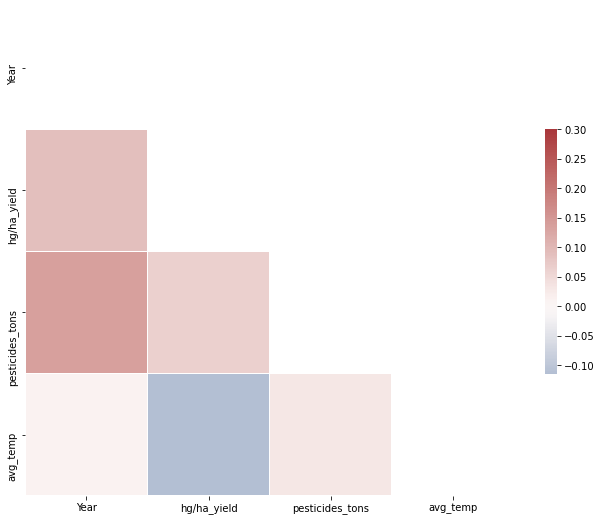

In [139]:
mask = np.zeros_like (df_correlate, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots (figsize=(11, 9))

# generate colormap
cmap = sns.palette ="vlag"

#draw the heatmap with the mask and correct aspect ratio
sns.heatmap (df_correlate, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink":.5});

### Based on this correlation map, no correlation was found between these variables in the dataframe.

# Data preprocessing


Data preprocessing involves transforming raw data into a clean and structured format suitable for analysis, which includes tasks like cleaning, normalization, and feature engineering.

### Encoding categorical variables

This dataframe contains two categorical columns, where categorical data represent labels rather than numeric values. Since many machine learning algorithms require numeric input variables, these categorical variables need to be converted. 

One hot encoding will be used for this purpose, transforming the categorical columns into binary columns representing each category, thereby creating a numerical matrix suitable for machine learning algorithms.

In [140]:
from sklearn.preprocessing import OneHotEncoder

In [141]:
df_yield_onehot = pd.get_dummies (df_yield, columns = ['Area',"Item"], prefix = ['Country', "Item"])
features = df_yield_onehot.loc[:, df_yield_onehot.columns != 'hg/ha_yield']
label = df_yield ['hg/ha_yield']
features.head ()

,Year,pesticides_tons,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990,121.0,16.37,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1990,121.0,16.37,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1990,121.0,16.37,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1990,121.0,16.37,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1990,121.0,16.37,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [142]:
features = features.drop(['Year'], axis=1)

In [143]:
features.head()

,pesticides_tons,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,121.0,16.37,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,121.0,16.37,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,121.0,16.37,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,121.0,16.37,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,121.0,16.37,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


The dataset contains features with widely varying magnitudes, units, and ranges. 

Features with larger magnitudes can disproportionately influence distance calculations compared to features with smaller magnitudes. 

To mitigate this effect, it is necessary to scale the features to bring them to a similar magnitude. 

This can be achieved through feature scaling.

In [144]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

In [145]:
features

array([[3.28894097e-04, 5.13458262e-01, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.28894097e-04, 5.13458262e-01, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.28894097e-04, 5.13458262e-01, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [6.93361288e-03, 6.28960818e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.93361288e-03, 6.28960818e-01, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.93361288e-03, 6.28960818e-01, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

The dataset will be split to two datasets, the training dataset and test dataset.

The training dataset (70% of the total) is used to teach the machine learning algorithm to make accurate predictions. The test dataset (30% of the total) evaluates the algorithm's performance to ensure unbiased assessment, as using the training data for testing would lead to biased results.

In [148]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(features, label, test_size=0.3, random_state=42)

## Model Comparison and Selection

In [149]:
from sklearn.metrics import r2_score
def compare_models(model):
    model_name = model.__class__.__name__
    fit=model.fit(train_data,train_labels)
    y_pred=fit.predict(test_data)
    r2=r2_score(test_labels,y_pred)
    return([model_name,r2])

In [150]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor

models = [
    GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=0),
     RandomForestRegressor(n_estimators=200, max_depth=3, random_state=0),
    svm.SVR(),
   DecisionTreeRegressor()
]

In [151]:
model_train=list(map(compare_models,models)) 

In [152]:
print(*model_train, sep = "\n")

['GradientBoostingRegressor', 0.883564513749073]
['RandomForestRegressor', 0.6839928919815761]
['SVR', -0.19572157181737726]
['DecisionTreeRegressor', 0.9617406829595162]


The evaluation metric used is the R² (coefficient of determination) regression score, which measures how well the regression model predicts the variance of the items (crops). 

R² ranges from 0 to 1, with 1 indicating perfect prediction and 0 indicating no prediction. 

The Decision Tree Regressor achieved the highest R² score at 96%, followed by the GradientBoostingRegressor.


Additionally, the Adjusted R² will be calculated, which also measures model fit but adjusts for the number of terms in the model. Adjusted R² decreases with the inclusion of irrelevant variables and increases with the inclusion of relevant variables, and it is always less than or equal to R².

In [153]:
df_yield_onehot = df_yield_onehot.drop (['Year'], axis =1)

In [154]:
df_yield_onehot.head()

,hg/ha_yield,pesticides_tons,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,36613,121.0,16.37,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,66667,121.0,16.37,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,23333,121.0,16.37,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,12500,121.0,16.37,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,7000,121.0,16.37,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [157]:
test_df=pd.DataFrame(test_data,columns=df_yield_onehot.loc[:, df_yield_onehot.columns != 'hg/ha_yield'].columns) 

In [158]:
cntry=test_df[[col for col in test_df.columns if 'Country' in col]].stack()[test_df[[col for col in test_df.columns if 'Country' in col]].stack()>0]
cntrylist=list(pd.DataFrame(cntry).index.get_level_values(1))
countries=[i.split("_")[1] for i in cntrylist]
itm=test_df[[col for col in test_df.columns if 'Item' in col]].stack()[test_df[[col for col in test_df.columns if 'Item' in col]].stack()>0]
itmlist=list(pd.DataFrame(itm).index.get_level_values(1))
items=[i.split("_")[1] for i in itmlist]

In [159]:
test_df.head()

,pesticides_tons,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,0.003141,0.341056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.004342,0.894378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.168871,0.164906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.008252,0.796593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000427,0.616354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [160]:
test_df.drop([col for col in test_df.columns if 'Item' in col],axis=1,inplace=True)
test_df.drop([col for col in test_df.columns if 'Country' in col],axis=1,inplace=True)
test_df.head()


,pesticides_tons,avg_temp
0,0.003141,0.341056
1,0.004342,0.894378
2,0.168871,0.164906
3,0.008252,0.796593
4,0.000427,0.616354


In [161]:
test_df['Country']=countries
test_df['Item']=items
test_df.head()

,pesticides_tons,avg_temp,Country,Item
0,0.003141,0.341056,Slovenia,Soybeans
1,0.004342,0.894378,Indonesia,Cassava
2,0.168871,0.164906,Canada,Maize
3,0.008252,0.796593,Honduras,Plantains and others
4,0.000427,0.616354,Rwanda,Yams


In [162]:
clf=DecisionTreeRegressor()
model=clf.fit(train_data,train_labels)

test_df["yield_predicted"]= model.predict(test_data)
test_df["yield_actual"]=pd.DataFrame(test_labels)["hg/ha_yield"].tolist()
test_group=test_df.groupby("Item")
test_group.apply(lambda x: r2_score(x.yield_actual,x.yield_predicted))

Item
Cassava                 0.934648
Maize                   0.869289
Plantains and others    0.774472
Potatoes                0.897800
Rice, paddy             0.905032
Sorghum                 0.450037
Soybeans                0.799283
Sweet potatoes          0.902152
Wheat                   0.940881
Yams                    0.943646
dtype: float64

Model actual values against the predicted ones 

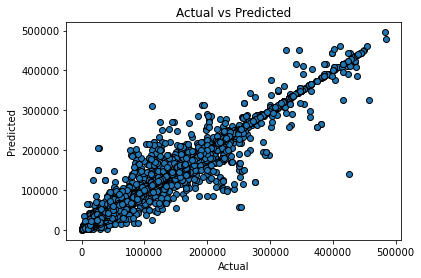

In [163]:
fig, ax = plt.subplots() 

ax.scatter(test_df["yield_actual"], test_df["yield_predicted"],edgecolors=(0, 0, 0))

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

In [164]:
def adjusted_r_squared(y,yhat,x):
    score=1- (((1-(r2_score(y,yhat)))*(len(y)-1))/(len(y)-x.shape[1]-2))
    return score

test_group.apply(lambda x: adjusted_r_squared(x.yield_actual,x.yield_predicted,x))


Item
Cassava                 0.933988
Maize                   0.868581
Plantains and others    0.764416
Potatoes                0.897263
Rice, paddy             0.904411
Sorghum                 0.445967
Soybeans                0.797866
Sweet potatoes          0.901392
Wheat                   0.940538
Yams                    0.942068
dtype: float64

## Model Results and Conclusion

In [167]:
varimp= {'imp':model.feature_importances_,'names':df_yield_onehot.columns[df_yield_onehot.columns!="hg/ha_yield"]}

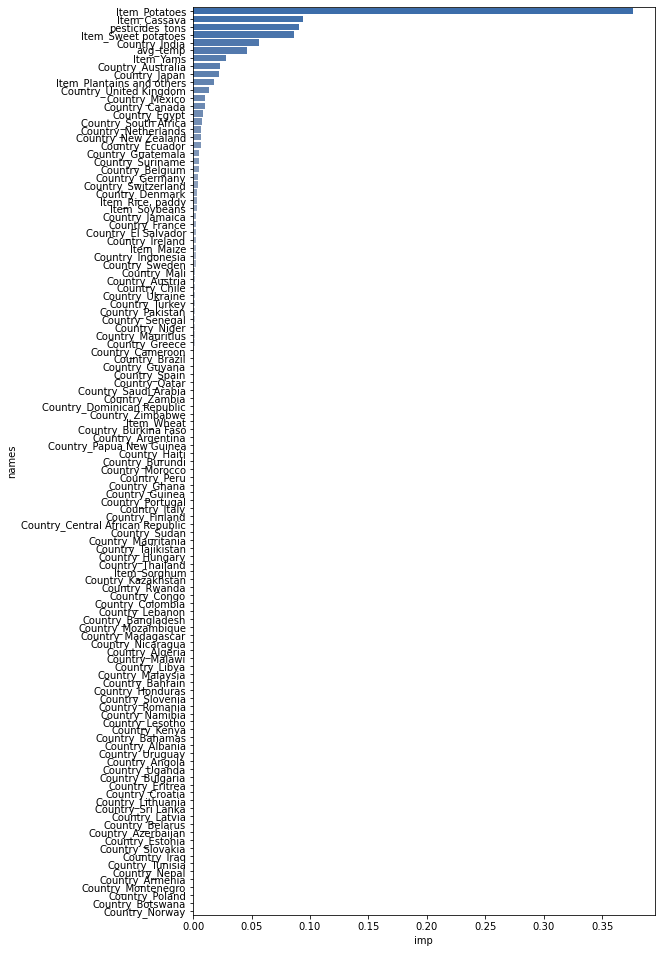

In [168]:
a4_dims = (8.27,16.7)

fig, ax = plt.subplots(figsize=a4_dims)
df=pd.DataFrame.from_dict(varimp)
df.sort_values(ascending=False,by=["imp"],inplace=True)
df=df.dropna()
sns.barplot(x="imp",y="names",palette="vlag",data=df,orient="h",ax=ax);

Getting top 7 of features importance in the model

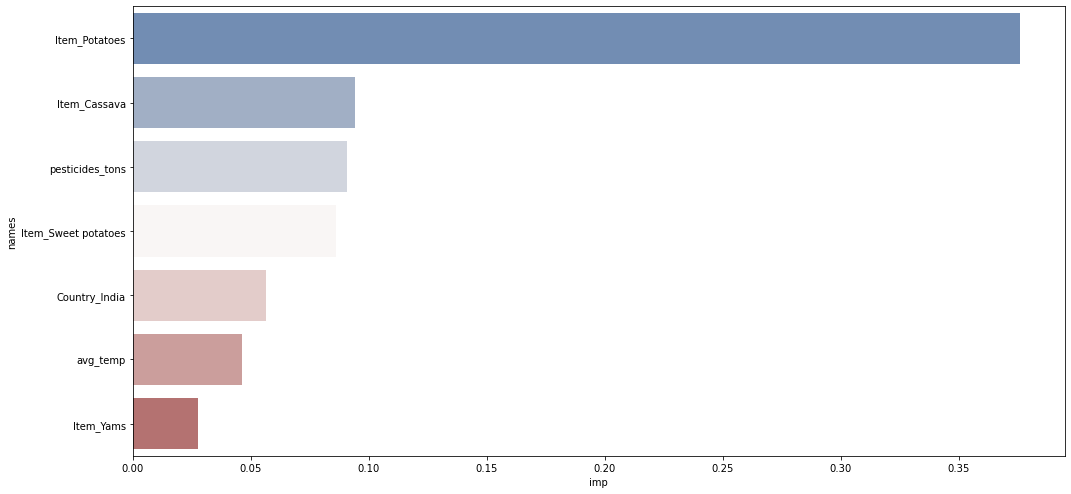

In [169]:
a4_dims = (16.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
df=pd.DataFrame.from_dict(varimp)
df.sort_values(ascending=False,by=["imp"],inplace=True)
df=df.dropna()
df=df.nlargest(7, 'imp')
sns.barplot(x="imp",y="names",palette="vlag",data=df,orient="h",ax=ax);

In the model, potatoes have the highest importance in decision-making, being the most prevalent crop in the dataset. 

Cassava is also highly significant, followed by the impact of pesticides. Sweet potatoes are among the top crops in terms of feature importance. 

The location of the crop in India is significant due to the large sum of crops from India in the dataset. 

Rainfall and temperature also significantly impact the expected crop yield, confirming initial assumptions about their importance.

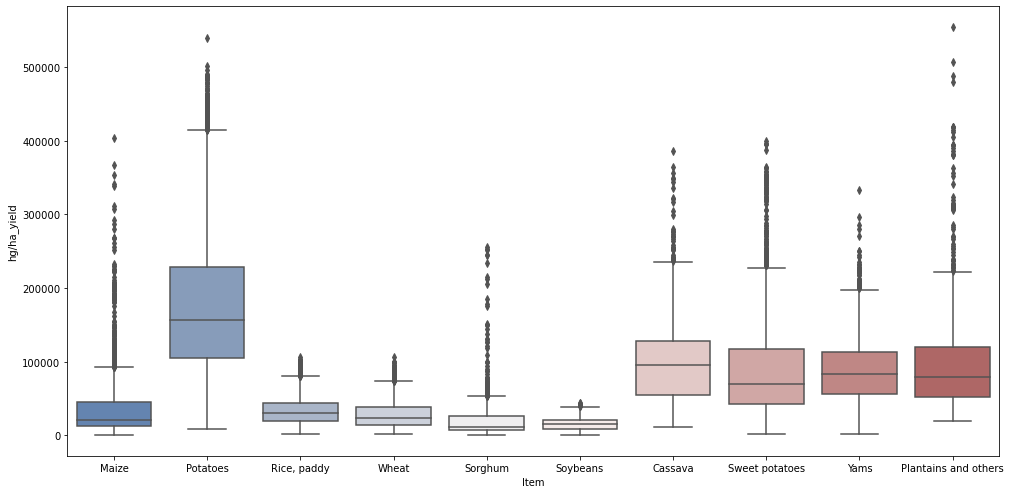

In [170]:
#Boxplot that shows yield for each item 
a4_dims = (16.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x="Item",y="hg/ha_yield",palette="vlag",data=yield_df,ax=ax);